In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')

In [3]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


- 1 = Basic Service
- 2 = E-Service
- 3 = Plus Service
- 4 = Total Service

In [4]:
df["custcat"].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

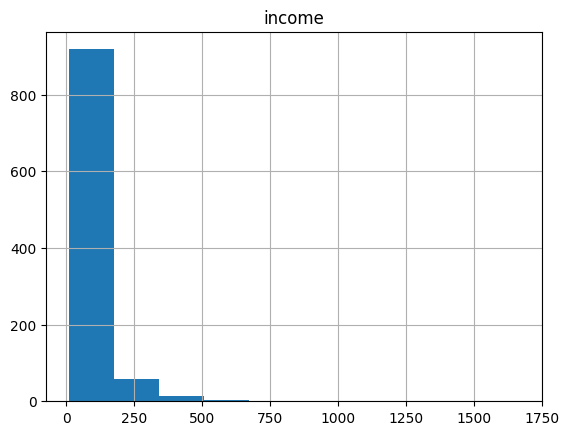

In [8]:
df.hist(column="income")

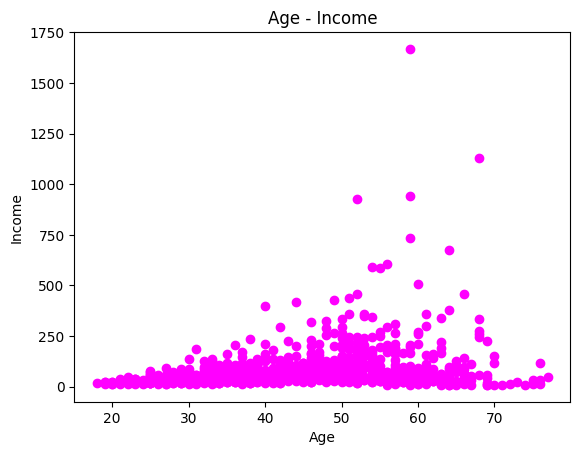

In [10]:
plt.scatter(df["age"], df["income"], color="magenta")
plt.title("Age - Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [11]:
import seaborn as sns

<Figure size 500x500 with 0 Axes>

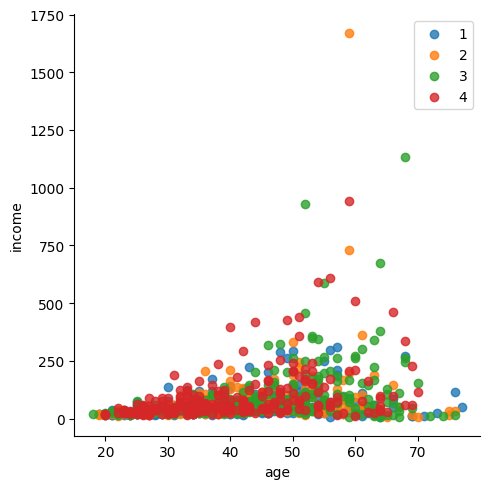

In [17]:
plt.figure(figsize=(5,5))
sns.lmplot( x="age", y="income", data=df, fit_reg=False, hue='custcat', legend=False)
plt.legend(loc='upper right')
plt.show()